<h1>Polynomial Approximation</h1>

<p>How well can we <em>approximate</em> a function with a polynomial?</p>

<p>The Taylor polynomial is the best approximation near a point $x=c$, but what polynomial is the "best" approximation over an entire interval $[a,b]$?</p>

<p>Here "best" <em>might</em> mean which $p$ has the smallest value of $max_{[a,b]} | f(x) - p(x) |$. This is the infinity-norm between two functions.</p>

<p>What do we know:</p>

<blockquote>
<p>Theorem 2 p315: Error in the polynomial interpolation Let $f$ be continuous of degreen $n+1$ over $[a,b]$ and $p$ be a polynomial interpolating $p$ at $n+1$ distinct points. Then for each $x$ there exists $\xi$ with 
$$ f(x) - p(x) = \frac{1}{(n+1)!} f^{(n+1)}(\xi) \prod_{i=0}^n (x - x_i). $$
</p>
</blockquote>

<h4>Example</h4>

<p>We can visualize this a bit: Consider $f(x) = \sin(x)$ on $[0, \pi/2]$. Then the interpolation between 2 points is just a secant line:</p>

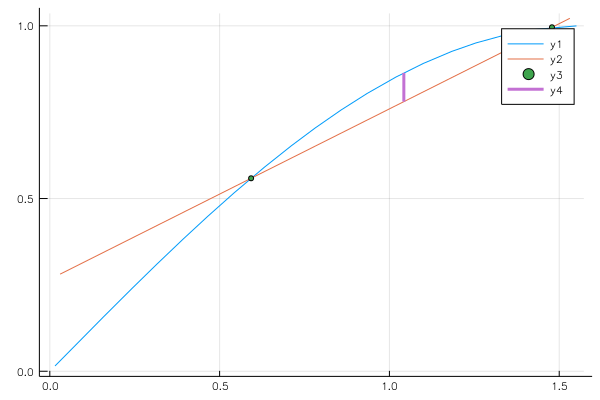

In [1]:
f(x) = sin(x)
a,b = pi/2 * sort(rand(2))
g(x) = f(a) + (f(b)-f(a))/(b-a)*(x-a)
plot(f, 0, pi/2)
plot!(g)
scatter!([a,b], f.([a,b]), markersize=3)

u = pi/2 * rand()
plot!([u,u], sort([f(u), g(u)]), linewidth=3)

<h4>Example</h4>

<p>For the function $f(x) = \cos(x)$ over the interval $[0, \pi/2]$ if $k=4+1$ points are chosen and a polynomial interpolates, then the difference is</p>


$$
\cos(x) - p(x) = \frac{1}{120} f^{(5)}(\xi) \prod_0^4(x-x_i)
$$


<p>This can be as large (in absolute value) as:</p>


$$
|\cos(x) - p(x)| \leq \frac{1}{120} \cdot 1 \cdot  (\pi/2)^5 = 0.07969262624616703
$$


<p>This is a worst case. We can graph to see the difference.</p>

In [1]:
function dd(f,xs)
  if length(xs) == 1
     f(xs[1])
  else
	 (dd(f,xs[2:end]) - dd(f, xs[1:end-1])) / (maximum(xs) - minimum(xs))
	 end
end

dd (generic function with 1 method)

In [1]:
n = 4
f(x) = cos(x)
a,b = 0, pi/2
xs = a + sort(rand(n+1)) * b

## prod_j=0^(k-1)(x-x_j)
prodk(x, k, xs) = prod([ x - xs[j+1] for j in 0:(k-1)])
## sum _(k=0)^n f[x_0, \dots x_k] prod_j=0^(k-1)(x-x_j)
p4(x) = f(xs[1]) + sum( [ dd(f, xs[1:(k+1)]) * prodk(x, k, xs) for k in 1:n])

p4 (generic function with 1 method)

<p>To visualize we try:</p>

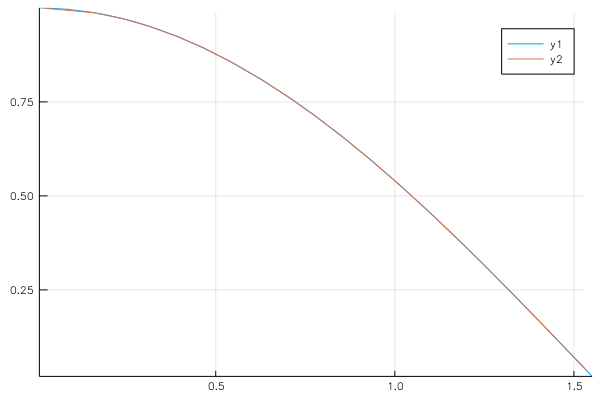

In [1]:
using Plots
plot(f, 0, pi/2)
plot!(p4)

<p>Not too illuminating, so we try this:</p>

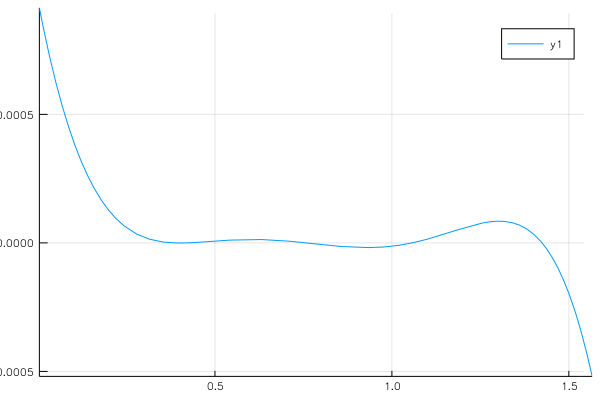

In [1]:
plot(x -> f(x) - p4(x), 0, pi/2)

<p>So the actual difference is nowhere near as large as is possible ($0.079$).</p>

<h3>Chebyshev polynomials</h3>

<p>Goal, make the difference as <em>small</em> as possible:</p>

<p>Fix $[-1,1]$ – this is no loss of generality as we can transform a polynomial.</p>

<p>Define special polynomials – Chebyshev polynomials of the first kind – by the relations:</p>


$$
T_0(x) = 1, \quad
T_1(x) = x, \quad
T_{n+1}(x) = 2x T_n(x) - T_{n-1}(x).
$$


<p>These will be polynomials with the smallest infinity norm in $[-1,1]$.</p>

<blockquote>
<p>Theorem. Fix $x$ in $[-1,1]$, then $T_n(x) = \cos(n \cos^{-1}(x))$ for $n \geq 0$.</p>
</blockquote>

<p>Pf. We need $\cos(A+B) = \cos(A) \cos(B) - \sin(A) \sin(B)$. So applying twice we get:</p>


$$
\cos((n+1)\theta) = \cos(n\theta + \theta) = \cos(n\theta) \cos\theta - \sin(n\theta) \sin\theta,\quad
\cos((n-1)\theta) = \cos(n\theta - \theta) = \cos(n\theta) \cos\theta + \sin(n\theta) \sin\theta.
$$


<p>So, we see that adding the two will give $2 \cos(n\theta) \cos\theta$, so that</p>


$$
\cos((n+1)\theta) = 2 \cos\theta \cos(n\theta) - \cos((n-1)\theta).
$$


<p>Now, $x = \cos\theta$ so $\theta = \cos^{-1}(x)$, so we have with $T_n = \cos(n\cos^{-1}(x))$ that these $T_n$ satisfy the defining relationship.</p>

<h4>Quick properties</h4>

<ul>
<li><p>We must have $|T_n(x)| \leq 1$ on $[-1,1]$, as the cosine function is so bounded</p>
</li>
<li><p>As $\cos^{-1}\cos(j\pi/n) = j\pi/n$ we have $T_n(\cos(j\pi/n_)$ is $(-1)^j$.</p>
</li>
<li><p>Similarly, $T_n(\cos((2j-1)\pi/(2n))) = 0$, for $1 \leq j \leq n$.</p>
</li>
<li><p>The leading coefficients are $2^{n-1}$. (Induction from the defining relationship $T_{n+1} = 2x\cdot T_n - T_{n-1}$.)</p>
</li>
</ul>

<blockquote>
<p>Thm: if $p$ is monic (leading coefficient $1$) then $\|p\|_\infty \geq 2^{1-n}$.</p>
</blockquote>

<p>Proof (p317): Assume <em>not</em>, then for <em>all</em> $x$ in $[-1,1]$ it must be $|p(x) < 2^{1-n}$. Let $q = 2^{1-n}T_n$ and $x_i = \cos(i\pi/n)$. Then $q$ is monic and $T_n(x_i)$ is $1$ or $-1$. So</p>


$$
(-1)^i p(x_i) \leq |p(x_i)| < 2^{1-n} \quad \text{(by assumption)}
$$


<p>So, for each $i$ in $0, 1, 2, \dots n$:</p>


$$
(-1)^i (q(x_i) - p(x_i) > 0).
$$


<p>This means the polynomial crosses $0$ atleast $n$ times. So either $q-p$ is a polynomial of degree $n$ or more or is the zero polynomial. But both $q$ and $p$ are monic of degree $n$, so their difference is a polynomial of degree <em>less</em> than $n$, hence it must be the $0$ polynomial.</p>

<h4>Application:</h4>

<p>So for a fixed number of nodes, to minimize the error between $f(x)$ and its interpolating polynomial <em>over</em> $[-1,1]$, use these Chebyshev nodes 
$$ x_i = \cos(\frac{2i-1}{2n+2}\pi). $$
</p>

<p>For these nodes, we have $max_{[-1,1]} |x-x_i|$ is as small as possible.</p>

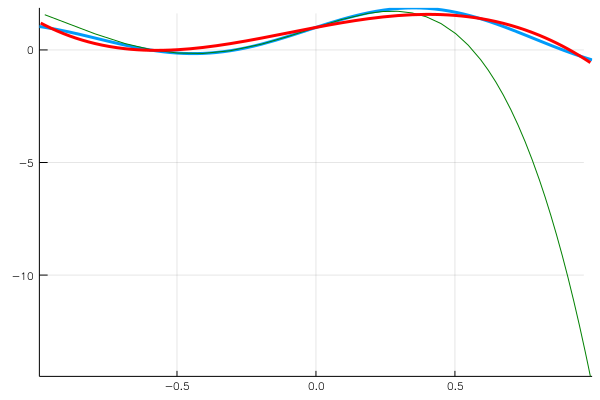

In [1]:
using Polynomials
f(x) =  sin(4x) + cos(x)^2
n = 5
xs = sort(2*rand(n) - 1)
zs = cos.((2*(0:4) +1)/(2n)* pi)
p = Polynomials.polyfit(xs, f.(xs))
q = Polynomials.polyfit(zs, f.(zs))
plot(f, -1, 1, legend=false, linewidth=3)
plot!(x->p(x), color=:green)
plot!(x->q(x), color=:red, linewidth=3)

<h2>The errors can grow!</h2>

<p>Fix a function $f$ and an interval $[a,b]$. We would expect that if we take more and more points to interpolate $f$ that the interpolating polynomial would get closer and closer to $p$. In fact, w might expect that $\|f-p_n\|_\infty \rightarrow 0$ as $n \rightarrow \infty$.</p>

<p>However, the bound on the error depends on the derivatives of the function. For some functions, these may get big, so it isn't the case that we definitely know that $\| f -p_n \|_\infty \rightarrow 0$. In fact:</p>

<blockquote>
<p>p319: "The surprising state of affairs is that for most continuous functions the quantity will not converge to 0"</p>
</blockquote>

<p>Example, (Runge 1901). Let $f(x) = 1/(x^2+1)$ and $[a,b] = [-5,5]$. We will use <em>evenly</em> spaced points and have a look:</p>

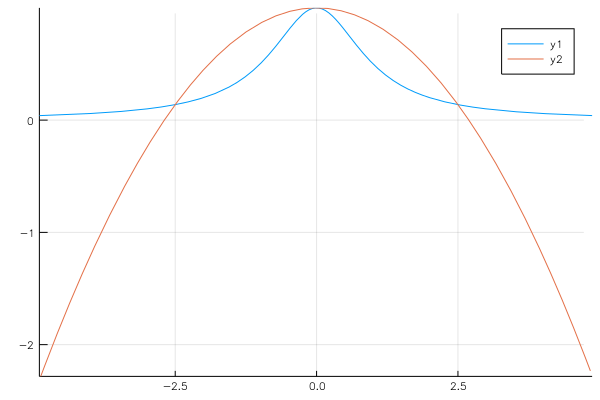

In [1]:
f(x) = 1/(x^2 + 1)
a,b = -5, 5


function show_n(n)
  xs = linspace(a, b, n + 1 + 2)[2:end-1]

  ip(x)  = f(xs[1]) + sum( [ dd(f, xs[1:(k+1)]) * prodk(x, k, xs) for k in 1:n])
  plot(f, a, b)
  plot!(ip)
end

show_n(2)

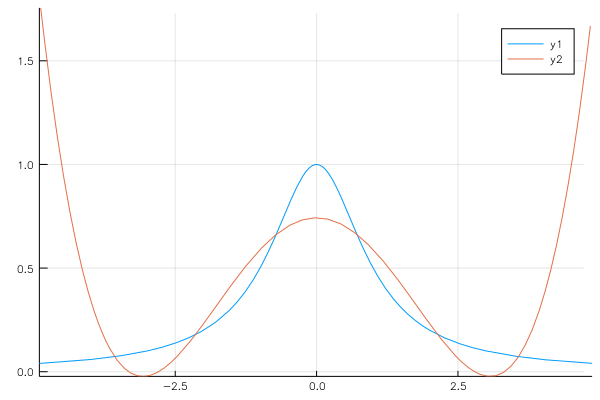

In [1]:
show_n(5)

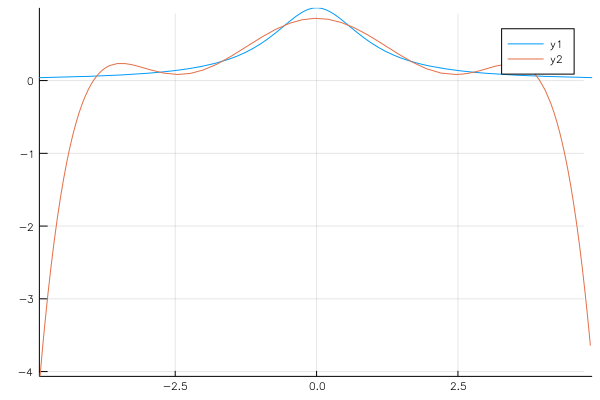

In [1]:
show_n(7)

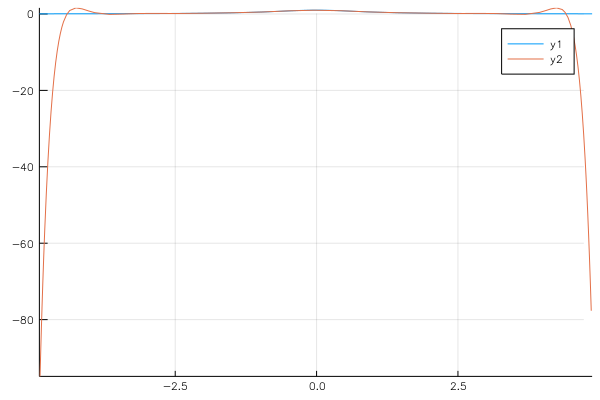

In [1]:
show_n(15)

<p>(There are better functions to approximate over an entire interval.)</p>

<p>Some theorems:</p>

<blockquote>
<p>Faber's Theorem p320: For each $n$, fix a set of nodes $a \leq x^{(n)}_1 < x^{(n)}_2 < \cdots <   x^{(n)}_n \leq b$. There is some function $f$ for which the interpolating polynomial will not converge uniformly to $f$.</p>
</blockquote>

<p>Meanwhile</p>

<blockquote>
<p>Convergence of interpolants p320: For each $f$ there is a system of nodes such that $p_n$ converges uniformly to $f$.</p>
</blockquote>

<p>So not all nodes will work, but for each $f$ some nodes will.</p>

<p>This next theorem is similar, but speaks just to the size of an error:</p>

<blockquote>
<p>Weirstrass Approximation Theorem. Let $f$ be continuous on $[a,b]$. Then for any $\epsilon > 0$ there exists a polynomial $p$ with $\|f-p\|_\infty < \epsilon$.</p>
</blockquote>

<p>The classic proof of this is <em>constructive</em>. Assume $[a,b] = [0,1]$. The Bernstein basis for the polynomials of degree $n$ is:</p>


$$
g_{nk}(x) = {n \choose k}x^k(1-x)^{n-k}
$$


<p>With this, we can defined a $n$th degree polynomial approximation to $f$ by:</p>


$$
B_n(f)(x) = \sum_{k=0}^n f(x/k) \cdot g_{nk}(x).
$$


<p><a href="https://en.wikipedia.org/wiki/Bernstein_polynomial">Wikipedia</a> shows that $B_n(f) \rightarrow f$ <em>uniformly</em> on $[0,1]$.</p>

<p>Wikipedia's proof uses probability. The book's proof uses Thm 9 (Bohman-Korovkin) to show that if we can prove convergence for three functions $1$, $x$ and $x^2$ then it will be true – provided $B_n(f)$ is a <em>linear operator</em> (which it is).</p>

<p>So, we would need to show the explicit <em>uniform</em> convergence of $B_n(x^k)$ for $k=0,1,2$. For $k=0$, $f(k/n) = 1$ and so:</p>


$$
B_n(1) = \sum_k g_{nk}(x) = \sum {n \choose k}x^k (1-x)^{n-k} = (x + (1-x))^n = 1.
$$


<p>and for $k=1$, $f(k/n) = k/n$ and so</p>


$$
B_n(x) = \sum {n \choose k} (k/n) x^k (1-x)^{n-k} = \sum_{k=1}^n {n-1 \choose k-1}x^k(1-x)^{n-k} = x \sum_{k=0}^{n-1} {n-1 \choose k} x^k (1-x)^{(n-1)-k} = x.
$$


<p>And for $k=2$, we will get (p323) $B_n(x^2)(x) = (n-1)/n x^2 + x/n$ which converges uniformly to $x^2$.</p>

<h3>ApproxFun</h3>

<p>In Julia, the <code>ApproxFun</code> package does computations by finding a high order polynomial approximation to the function $f$ and then solving using the polynomial approximation.</p>

<p>For example, we have from the <a href="https://github.com/JuliaApproximation/ApproxFun.jl">Readme</a></p>

In [1]:
using ApproxFun
x = x = Fun(identity,0..pi)
f = sin(x^2)
g = cos(x)

<p>And then</p>

In [1]:
h = f + g^2
r = roots(h)
rp = roots(h')

using Plots
plot(h)
scatter!(r,h.(r))
scatter!(rp,h.(rp))

<p>Secretly <code>h</code> is a high order polynomial:</p>

In [1]:
h.coefficients

<h3>Bezier Curves</h3>

<p>The Bernstein polynomials find another usage:</p>

<p>Consider this great graphic: https://www.jasondavies.com/animated-bezier/</p>

<p>There are $n+1$ points $P_0, P_1, \dots, P_n$. The blue circles <em>interpolate</em> between $P_i$ and $P_{i+1}$ at the same rate. Between adjacent blue circles are further interpolations, and so on until there is just one circle, which lays out a trajectory. The resulting trajectory is the Bezier curve for the given control points.</p>

<p>What are the mathematics behind this? The Bernstein basis comes in:</p>


$$
B(t) = \sum_{k=0}^n {n \choose k} t^k (1-t)^k P_k
$$


<p>Can we graph?</p>

In [1]:
choose(n,k) = gamma(n+1) / gamma(k+1) / gamma(n-k+1)   

choose (generic function with 1 method)

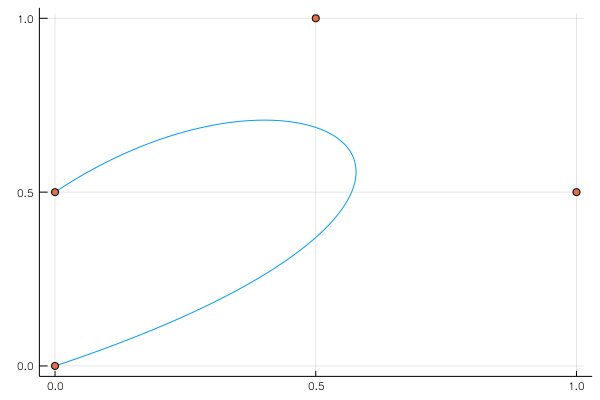

In [1]:
Ps = [[0,0], [1,1/2], [1/2, 1], [0,1/2]]
n = length(Ps) - 1
B(t) = sum(choose(n,k) * t^k *(1-t)^(n-k) * Ps[k+1] for k in 0:n)
plot(t -> B(t)[1], t -> B(t)[2], 0, 1, legend=false)
scatter!([u[1] for u in Ps], [u[2] for u in Ps])